# Séance 2 - *correction*

In [1]:
import matplotlib.pyplot
import pandas
import scipy.stats
import numpy

%matplotlib inline

## Worldwide Governance Indicators (WGI)

Importation des données

In [2]:
wgi_raw = pandas.read_csv("WGI_Data.csv", na_values = "..")
wgi_raw.head()

,Country Name,Country Code,Series Name,Series Code,Value
0,Afghanistan,AFG,Control of Corruption: Estimate,CC.EST,-1.563735
1,Afghanistan,AFG,Government Effectiveness: Estimate,GE.EST,-1.222106
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,-2.749167
3,Afghanistan,AFG,Regulatory Quality: Estimate,RQ.EST,-1.327919
4,Afghanistan,AFG,Rule of Law: Estimate,RL.EST,-1.616430


### Reconstruction du tableau

Reconstruire un tableau avec en ligne les pays (on souhaite avoir le nom et le code) et en colonnes les 6 variables (en simplifiant les noms).

In [3]:
wgi = wgi_raw.pivot(index = "Country Name", 
                    columns = "Series Name", 
                    values = "Value").reset_index() 
# reset_index() -> nom des lignes comme colonne
wgi.columns = ["Country", "Corruption", "Effectiveness", 
               "Stability", "Regulation", "Law", "Voice"]
wgi.head()

,Country,Corruption,Effectiveness,Stability,Regulation,Law,Voice
0,Afghanistan,-1.563735,-1.222106,-2.749167,-1.327919,-1.616430,-1.086220
1,Albania,-0.397567,-0.000573,0.257720,0.188962,-0.347468,0.159191
2,Algeria,-0.691359,-0.544695,-1.139282,-1.171843,-0.849319,-0.877241
3,American Samoa,1.230341,0.531472,1.192534,0.136647,1.328246,NaN
4,Andorra,1.230341,1.860201,1.396047,0.871409,1.564011,1.197540


In [4]:
wgi_bis = wgi_raw.pivot_table(index = ["Country Name", "Country Code"], 
                              columns = "Series Name", values = "Value").reset_index()
wgi_bis.columns = ["Country", "Code", "Corruption", "Effectiveness", "Stability", "Regulation", "Law", "Voice"]
wgi_bis.head()

,Country,Code,Corruption,Effectiveness,Stability,Regulation,Law,Voice
0,Afghanistan,AFG,-1.563735,-1.222106,-2.749167,-1.327919,-1.616430,-1.086220
1,Albania,ALB,-0.397567,-0.000573,0.257720,0.188962,-0.347468,0.159191
2,Algeria,DZA,-0.691359,-0.544695,-1.139282,-1.171843,-0.849319,-0.877241
3,American Samoa,ASM,1.230341,0.531472,1.192534,0.136647,1.328246,NaN
4,Andorra,AND,1.230341,1.860201,1.396047,0.871409,1.564011,1.197540


### France

Donner les informations de la France

In [5]:
wgi.query('Country == "France"')

,Country,Corruption,Effectiveness,Stability,Regulation,Law,Voice
65,France,1.3662,1.406624,-0.064124,1.07025,1.406672,1.076472


In [6]:
wgi[wgi["Country"] == "France"]

,Country,Corruption,Effectiveness,Stability,Regulation,Law,Voice
65,France,1.3662,1.406624,-0.064124,1.07025,1.406672,1.076472


### Pays européens

Donner les informations de 5 pays européens

In [7]:
wgi.query('Country.isin(["Spain", "Portugal", "Denmark", "Sweden", "United Kingdom"])')

,Country,Corruption,Effectiveness,Stability,Regulation,Law,Voice
52,Denmark,2.243141,1.887565,0.847920,1.575460,1.895959,1.474219
154,Portugal,0.960252,1.220307,1.017052,0.844362,1.130085,1.172997
176,Spain,0.523910,1.116256,0.487920,1.008647,0.977568,1.058288
184,Sweden,2.221304,1.787078,0.980088,1.854339,2.043331,1.503111
202,United Kingdom,1.880500,1.610875,0.379436,1.760832,1.626928,1.237119


### TOP10 corruption

Trouver les 10 pays ayant les valeurs les plus hautes pour Control of Corruption

In [8]:
wgi.sort_values("Corruption", ascending = False).head(10)

,Country,Corruption,Effectiveness,Stability,Regulation,Law,Voice
139,New Zealand,2.295205,1.857645,1.490121,2.038402,1.927021,1.444160
64,Finland,2.283062,1.848473,0.961734,1.817479,2.017793,1.485528
52,Denmark,2.243141,1.887565,0.847920,1.575460,1.895959,1.474219
184,Sweden,2.221304,1.787078,0.980088,1.854339,2.043331,1.503111
144,Norway,2.199341,1.882856,1.166539,1.698048,2.020467,1.581641
112,Luxembourg,2.076302,1.692127,1.407011,1.722259,1.714604,1.436767
169,Singapore,2.070711,2.208584,1.528321,2.180700,1.832003,-0.283165
110,Liechtenstein,2.051135,1.701244,1.462339,1.372746,1.677674,1.187996
185,Switzerland,2.050514,2.025628,1.322083,1.912119,1.935614,1.458404
84,Iceland,1.987732,1.408098,1.334695,1.276788,1.510319,1.341522


### Moyenne

Donner les valeurs moyennes, minimales et maximales de chaque indicateurs

In [9]:
wgi.drop(columns = "Country").aggregate(["mean", "min", "max"]).round(2)

,Corruption,Effectiveness,Stability,Regulation,Law,Voice
mean,0.00,0.00,-0.00,0.00,-0.00,0.00
min,-1.81,-2.26,-2.91,-2.33,-2.37,-2.13
max,2.30,2.21,1.96,2.18,2.04,1.58


### Les mauvais élèves

Donner les pays avec les valeurs minimales pour chaque indicateur (en plusieurs commandes)

In [10]:
for indicateur in wgi.columns[1:]:
    print(wgi.sort_values(indicateur).head(1))

              Country  Corruption  Effectiveness  Stability  Regulation  \
59  Equatorial Guinea    -1.81344      -1.409005  -0.192912   -1.380166   

        Law     Voice  
59 -1.43647 -1.925956  
         Country  Corruption  Effectiveness  Stability  Regulation       Law  \
175  South Sudan   -1.577316      -2.259862   -2.41843   -1.855619 -1.691816   

        Voice  
175 -1.670892  
                  Country  Corruption  Effectiveness  Stability  Regulation  \
186  Syrian Arab Republic   -1.572222      -1.824969  -2.914053   -1.666149   

          Law     Voice  
186 -2.005617 -1.958976  
                      Country  Corruption  Effectiveness  Stability  \
99  Korea, Dem. People’s Rep.    -1.44959       -1.64748  -0.710826   

    Regulation      Law     Voice  
99    -2.33193 -1.63241 -2.132314  
     Country  Corruption  Effectiveness  Stability  Regulation       Law  \
173  Somalia   -1.688282      -2.180418  -2.330217   -2.265197 -2.370821   

        Voice  
173 -1.833594

In [11]:
vars = wgi.columns[1:]
res = []
for indicateur in vars:
    temp = wgi.sort_values(indicateur).head(1)
    temp[vars[vars != indicateur]] = None
    if len(res) == 0:
        res = temp
    else:
        res = res.append(temp)
res

,Country,Corruption,Effectiveness,Stability,Regulation,Law,Voice
59,Equatorial Guinea,-1.81344,NaN,NaN,NaN,NaN,NaN
175,South Sudan,NaN,-2.259862,NaN,NaN,NaN,NaN
186,Syrian Arab Republic,NaN,NaN,-2.914053,NaN,NaN,NaN
99,"Korea, Dem. People’s Rep.",NaN,NaN,NaN,-2.33193,NaN,NaN
173,Somalia,NaN,NaN,NaN,NaN,-2.370821,NaN
99,"Korea, Dem. People’s Rep.",NaN,NaN,NaN,NaN,NaN,-2.132314


## Diamonds

A partir du fichier diamonds.csv (voir l'aide ici), analyser les données suivant le déroulement classique

1. Description de chaque variable
2. Recherche des liens entre le prix (price) et les autres variables

### Importation des données

In [12]:
diamonds = pandas.read_csv("diamonds.csv",
                          header=0, sep=",")
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Description des variables

Dans ce cadre, il faut décrire chaque variable séparement. Voici la répartition des variables et les étapes à réaliser pour chaque type de variable :

- *quantitative* : `carat, depth, table, price, x, y, z`
    - Moyenne, écart-type, médiane, minimum et maximum
    - Histogramme pour avoir un aperçu de la distribution, et éventuellement comparer à une gaussienne
    - Test de normalité à ajouter
    - Boîte à moustaches pour estimer la présence ou non d'outliers
- *qualitative* : `cut, color, clarity`
    - Table d'effectifs et de pourcentages
    - Diagramme en barres (diagramme circulaire à éviter ici, car trop de modalités)
    
Nous allons faire une fonction permettant la description d'une variable (en fonction de son type bien évidemment), et l'utiliser pour chacune des colonnes du jeu de données.

#### Quanti

Variable   : carat 

Moyenne    :  0.8
Ecart-type :  0.47
Médiane    :  0.7
Minimum    :  0.2
Maximum    :  5.01


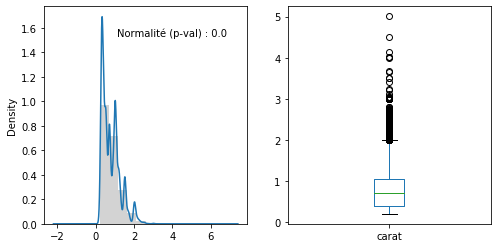

In [13]:
def descQuanti(var):
    # description d'une variable quantitative du jeu de données diamonds
    # récupération des valeurs
    x = diamonds[var]
    # affichage des différentes informations demandées
    print("Variable   :", var, "\n")
    print("Moyenne    : ", numpy.mean(x).round(2))
    print("Ecart-type : ", numpy.std(x).round(2))
    print("Médiane    : ", numpy.median(x).round(2))
    print("Minimum    : ", numpy.min(x).round(2))
    print("Maximum    : ", numpy.max(x).round(2))
    # création d'un graphique avec 2 zones
    fig, (ax1, ax2) = matplotlib.pyplot.subplots(nrows=1, ncols=2, figsize=(8, 4))
    # création de l'histogramme avec la densité
    h = x.plot(kind = "hist", density = True, color = "lightgrey", ax = ax1)
    x.plot(kind = "kde", ax = ax1)
    # on y ajoute la p-value du test de normalité
    t = scipy.stats.normaltest(x)
    matplotlib.pyplot.text(.9, .9, "Normalité (p-val) : " + str(t.pvalue),
                           horizontalalignment='right',
                           verticalalignment='top',
                           transform = h.transAxes)
    # création de la boîte à moustache
    diamonds.boxplot(column = var, grid = False, ax = ax2)

# on lance sur la variable 'carat' 
descQuanti("carat")
# à faire sur les autres variables
# descQuanti("depth")
# ...

#### Quali

Variable   : cut 

col_0      Effectif  Pourcentage
cut                             
Fair           1610         2.98
Good           4906         9.10
Ideal         21551        39.95
Premium       13791        25.57
Very Good     12082        22.40


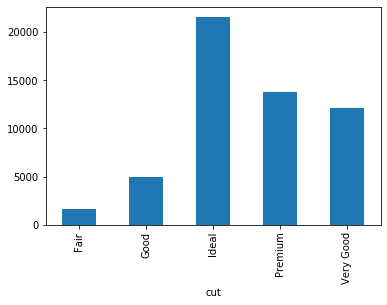

In [14]:
def descQuali(var):
    # description d'une variable qualitative du jeu de données diamonds
    # récupération des valeurs
    x = diamonds[var]
    # affichage des différentes informations demandées
    print("Variable   :", var, "\n")
    # tableau des effectifs et des proportions
    eff = pandas.crosstab(x, "Effectif")
    pro = pandas.crosstab(x, "Pourcentage", normalize=True) * 100
    print(pandas.concat([eff, pro.round(2)], axis = 1))
    # diagramme en barres
    eff.plot(kind = "bar", legend = False)

# on lance sur la variable "cut"
descQuali("cut")
# à faire sur les autres variables
# descQuali("color")
# ...

### Lien avec price

Ici, en fonction du type de la variable pour laquelle estimer le lien avec price, les opérations ne sont pas les mêmes à effectuer.

- *quantitative* : `carat, depth, table, x, y, z`
    - Corrélation, avec test de corrélation
    - Nuage de points
- *qualitative* : `cut, color, clarity`
    - ANOVA
    - Boîtes à moustaches pour chaque modalité

On peut commencer par représenter la corrélation de chaque variable quantitative avec la variable price.

In [15]:
# calcul des corrélations et affichage
cor = diamonds.corr().price
cor

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

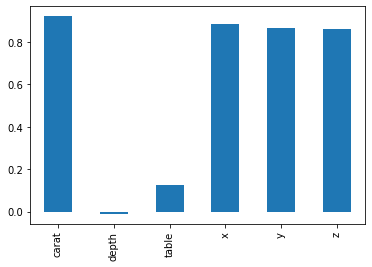

In [16]:
# représentation sur un diagramme en barres (peu classique mais efficace)
cor.drop("price").plot(kind = "bar")

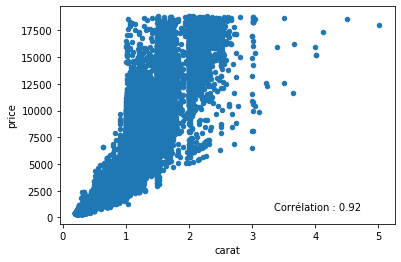

In [17]:
# Création d'une fonction affichant le nuage de points (avec la corrélation)
def lienPriceQuanti(var):
    # nuage de points entre price et la variable passée en paramètre pour le jeu de données diamonds
    n = diamonds.plot.scatter(var, "price")
    # calcul de la corrélation
    cor = diamonds.price.corr(diamonds[var])
    # affichage de la corrélation
    matplotlib.pyplot.text(.9, .1, "Corrélation : " + str(cor.round(2)),
                           horizontalalignment='right',
                           verticalalignment='top',
                           transform = n.transAxes)

# on lance sur la variable "carat"
lienPriceQuanti("carat")
# à faire sur les autres variables
# lienPriceQuanti("depth")
# ...

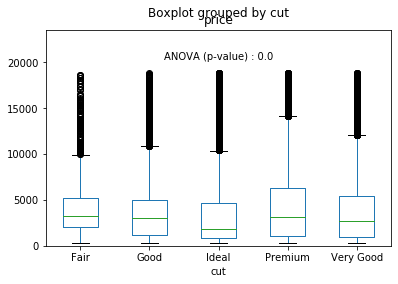

In [18]:
# Création d'une fonction pour établir le lien entre price et une variable quali
def lienPriceQuali(var):
    # on récupère les valeurs de la variable
    x = diamonds[var]
    # création des boîtes à moustaches
    b = diamonds.boxplot(column = "price", by = var, grid = False) 
    # ajout d'un espace en haut du graphique pour y mettre la p-value de l'ANOVA
    b.set_ylim(0, numpy.max(diamonds.price) * 1.25)
    # calcul de l'ANOVA
    g = [diamonds.price[x == s] for s in list(x.unique())]
    aov = scipy.stats.f_oneway(*g)
    # ajout de la p-value dans le graphique
    matplotlib.pyplot.text(.5, .9, "ANOVA (p-value) : " + str(aov.pvalue.round(5)),
                           horizontalalignment='center',
                           verticalalignment='top',
                           transform = b.transAxes)

# on lance sur la variable "cut"
lienPriceQuali("cut")
# à faire sur les autres variables
# lienPriceQuali("color")
# ...